In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('CO22339_soil_measures.csv')
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
y = y.ravel()

In [4]:
dataset.head(7)

,N,P,K,ph,crop
0,76,23,44,6.91,wheat
1,55,32,35,6.20,wheat
2,56,32,45,5.92,wheat
3,71,40,44,6.15,wheat
4,70,38,39,6.09,rice
5,90,46,42,7.30,rice
6,52,29,34,6.20,wheat


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Labelencoder = LabelEncoder()
y = Labelencoder.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

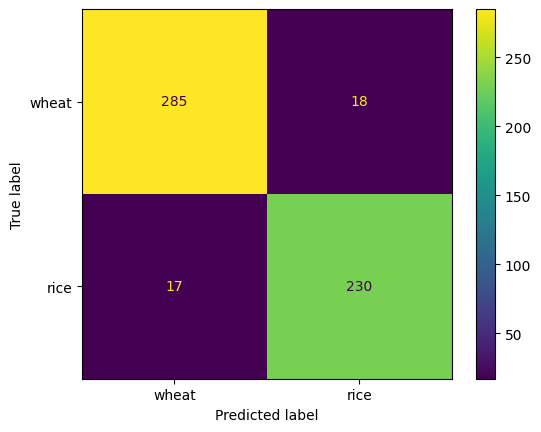

In [11]:
classes = dataset.crop.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
print("The accuracy score is:", accuracy_score(y_test, y_pred))
print("The precision score is:", precision_score(y_test, y_pred, average='macro'))
print("The recall score is:",recall_score(y_test, y_pred, average='macro'))
print("The f1_score score is:", f1_score(y_test, y_pred, average='macro'))

The accuracy score is: 0.9363636363636364
The precision score is: 0.9355639820551165
The recall score is: 0.9358840742373833
The f1_score score is: 0.9357208448117539


<ipython-input-14-736279243413>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


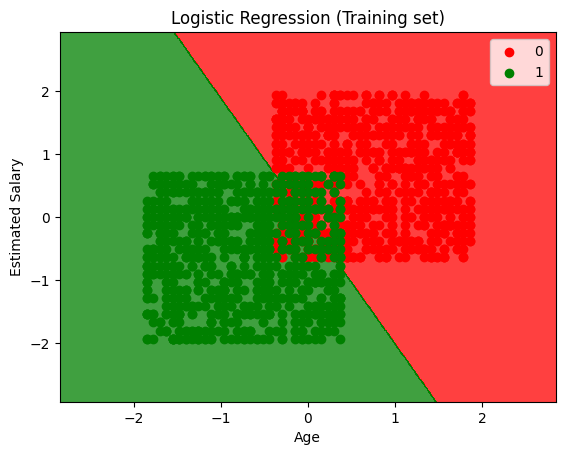

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

# Create meshgrid with all 4 features if needed
# Assuming X_set has 4 features
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Prepare the grid data with all 4 features
# Replace with appropriate feature indices if necessary
grid_data = np.array([X1.ravel(), X2.ravel(),
                      np.zeros_like(X1.ravel()),  # Placeholder for 3rd feature
                      np.zeros_like(X1.ravel())]).T # Placeholder for 4th feature


plt.contourf(X1, X2, classifier.predict(grid_data).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')  # Replace with actual feature name
plt.ylabel('Estimated Salary') # Replace with actual feature name
plt.legend()
plt.show()